# Dealing with Outliers

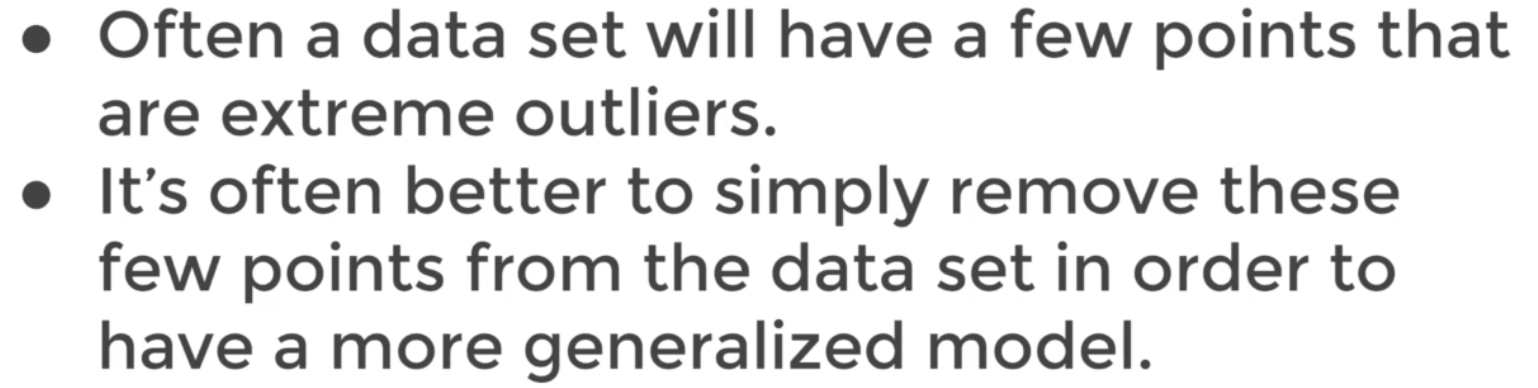<br>
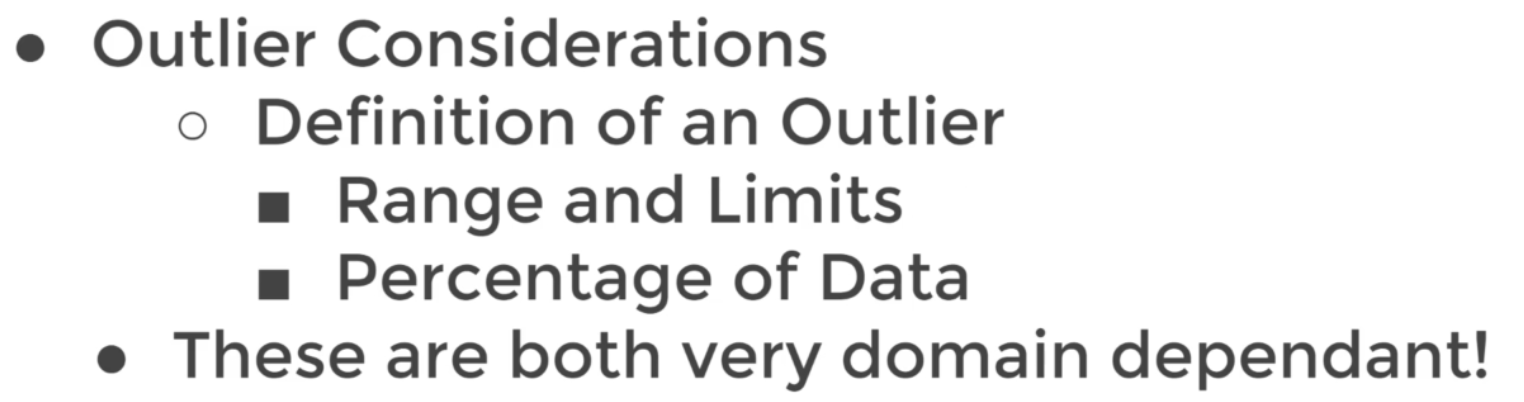<br>
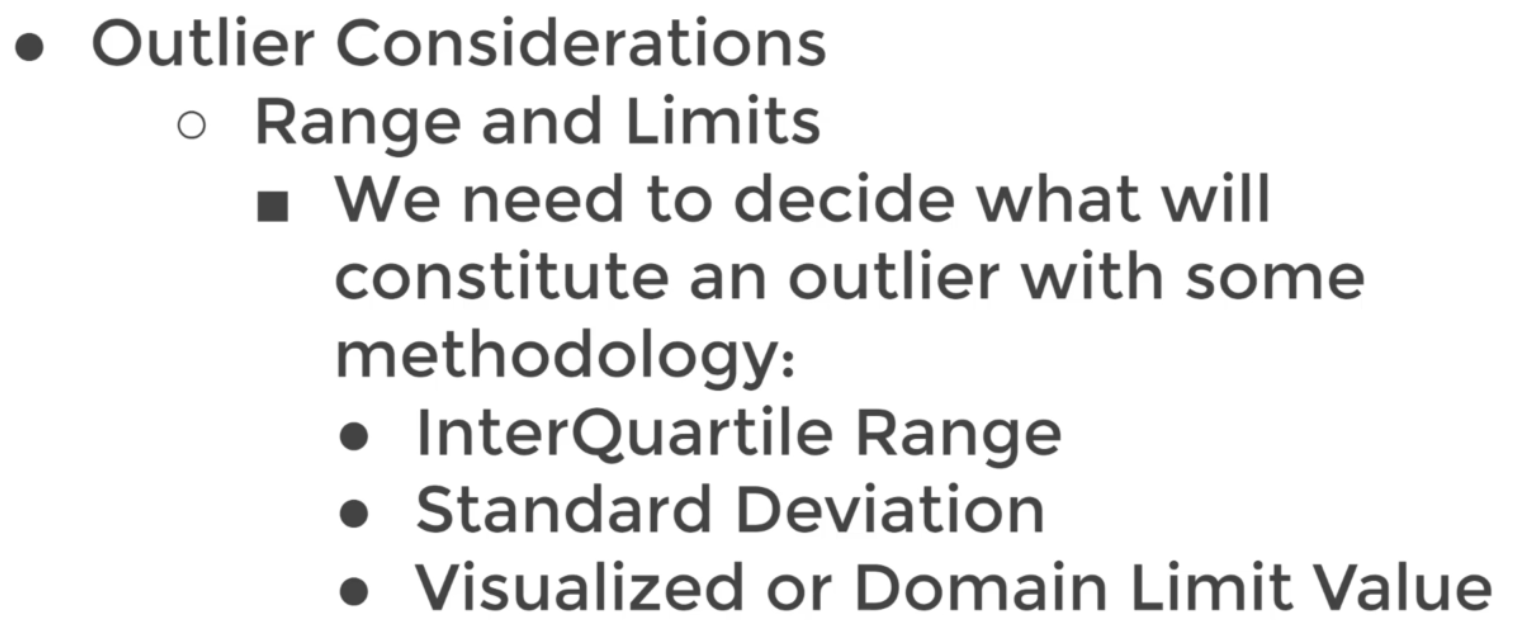<br>
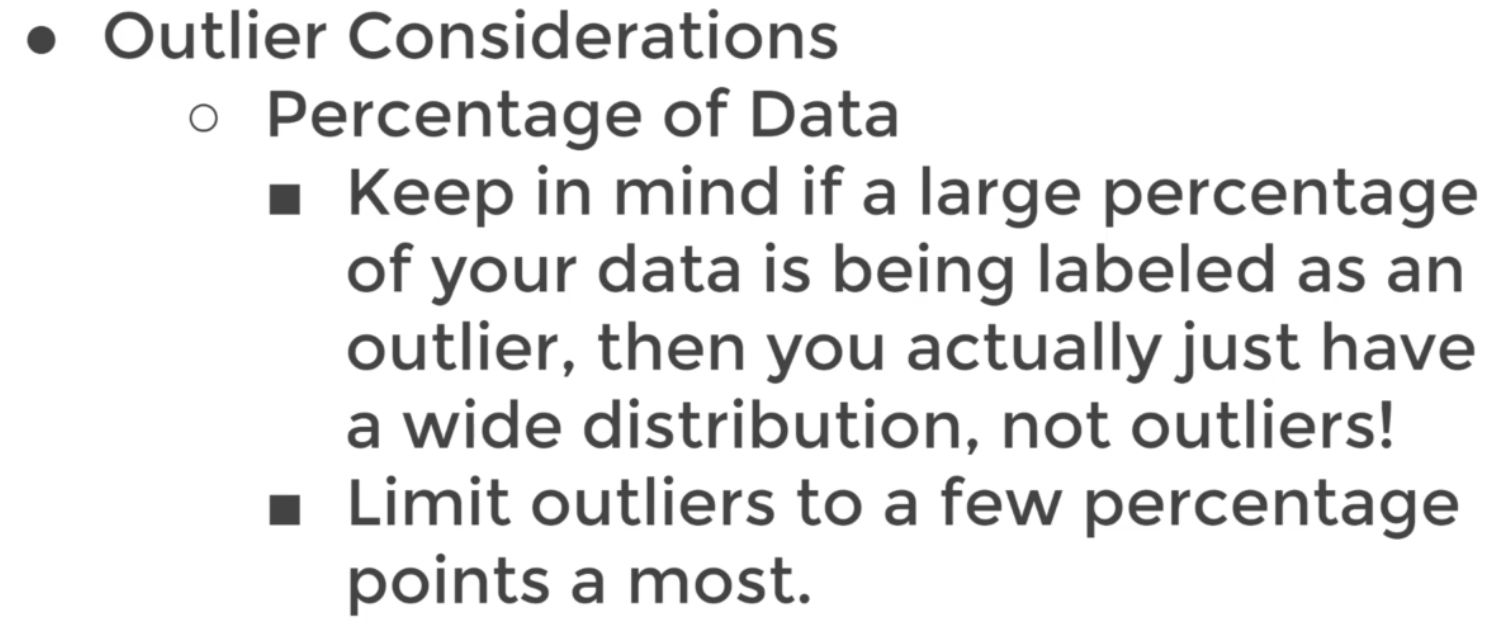<br>
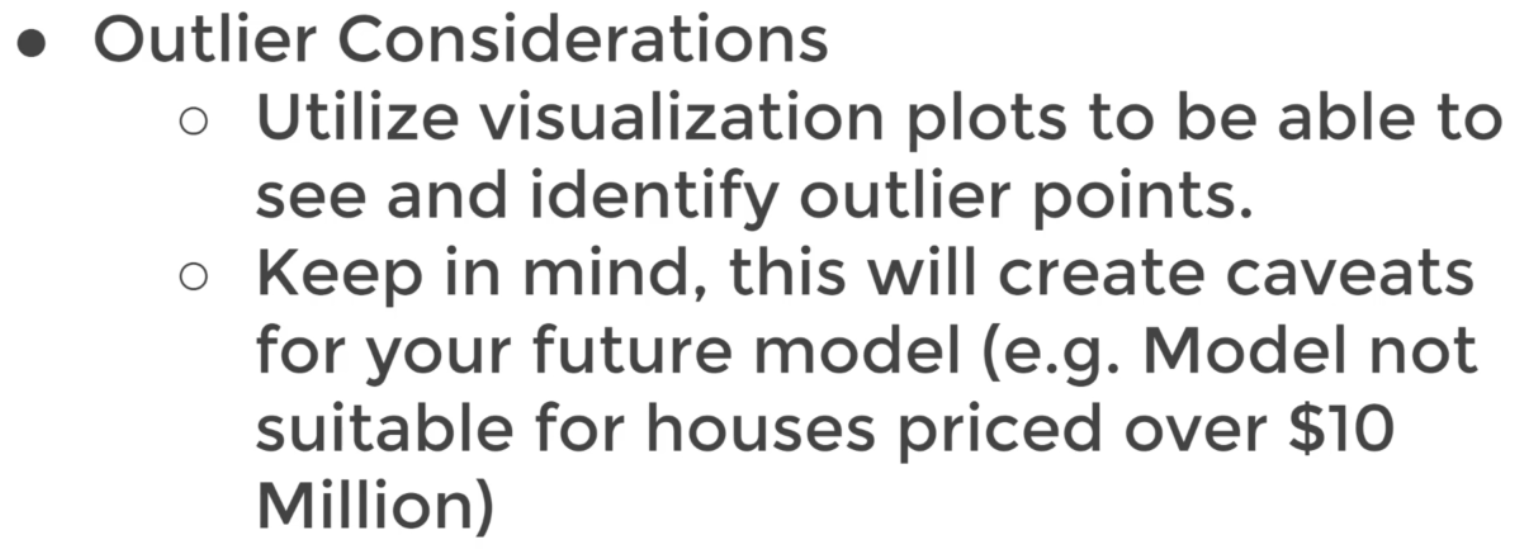<br>
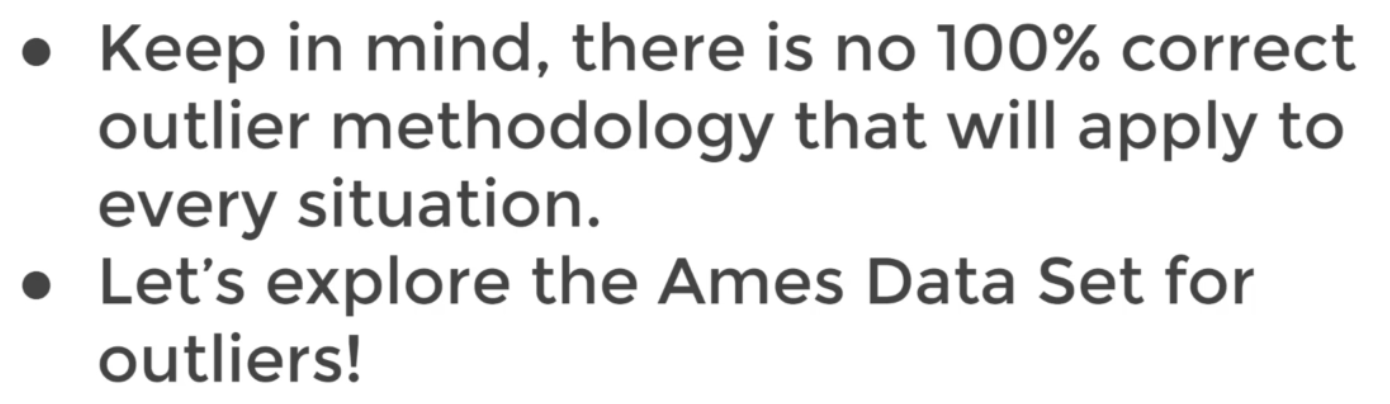<br>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
def create_ages(mu=50, sigma=13,num_samples=100,seed=42):
    #Set the random seed in the same cell as the random call
    #We set seed to 42
    np.random.seed(seed)
    sample_ages = np.random.normal(mu,sigma,num_samples)
    sample_ages = np.round(sample_ages,decimals=0)
    return sample_ages

In [5]:
sample = create_ages()
sample

array([56., 48., 58., 70., 47., 47., 71., 60., 44., 57., 44., 44., 53.,
       25., 28., 43., 37., 54., 38., 32., 69., 47., 51., 31., 43., 51.,
       35., 55., 42., 46., 42., 74., 50., 36., 61., 34., 53., 25., 33.,
       53., 60., 52., 48., 46., 31., 41., 44., 64., 54., 27., 54., 45.,
       41., 58., 63., 62., 39., 46., 54., 63., 44., 48., 36., 34., 61.,
       68., 49., 63., 55., 42., 55., 70., 50., 70., 16., 61., 51., 46.,
       51., 24., 47., 55., 69., 43., 39., 43., 62., 54., 43., 57., 51.,
       63., 41., 46., 45., 31., 54., 53., 50., 47.])

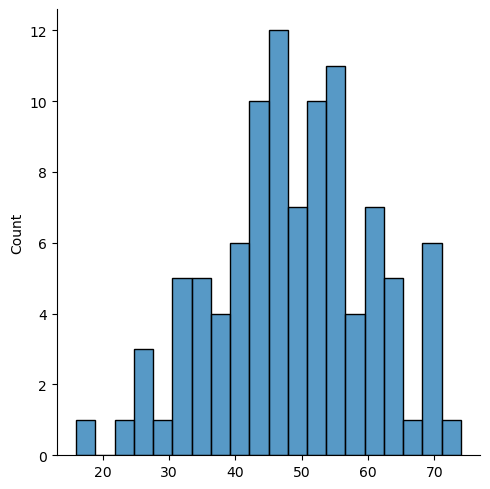

In [6]:
sns.displot(sample,bins=20)

<Axes: >

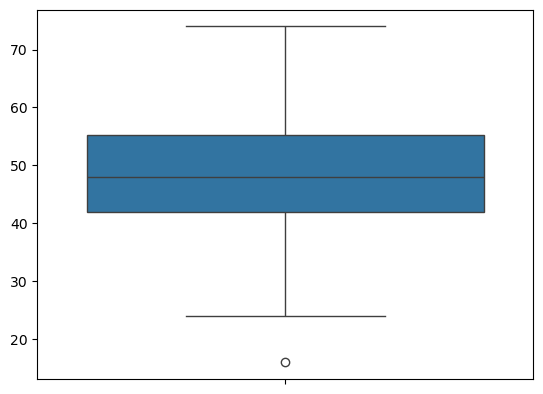

In [7]:
sns.boxplot(sample)

In [8]:
ser = pd.Series(sample)

In [9]:
ser

0     56.0
1     48.0
2     58.0
3     70.0
4     47.0
      ... 
95    31.0
96    54.0
97    53.0
98    50.0
99    47.0
Length: 100, dtype: float64

# IQR - Interquartile range
* In descriptive statistics, the interquartile range (IQR) is a measure of statistical dispersion, which is the spread of the data. The IQR may also be called the midspread, middle 50%, fourth spread, or H‑spread. It is defined as the difference between the 75th and 25th percentiles of the data.
* The IQR is an example of a trimmed estimator, defined as the 25% trimmed range, which enhances the accuracy of dataset statistics by dropping lower contribution, outlying points. It is also used as a robust measure of scale. It can be clearly visualized by the box on a box plot.
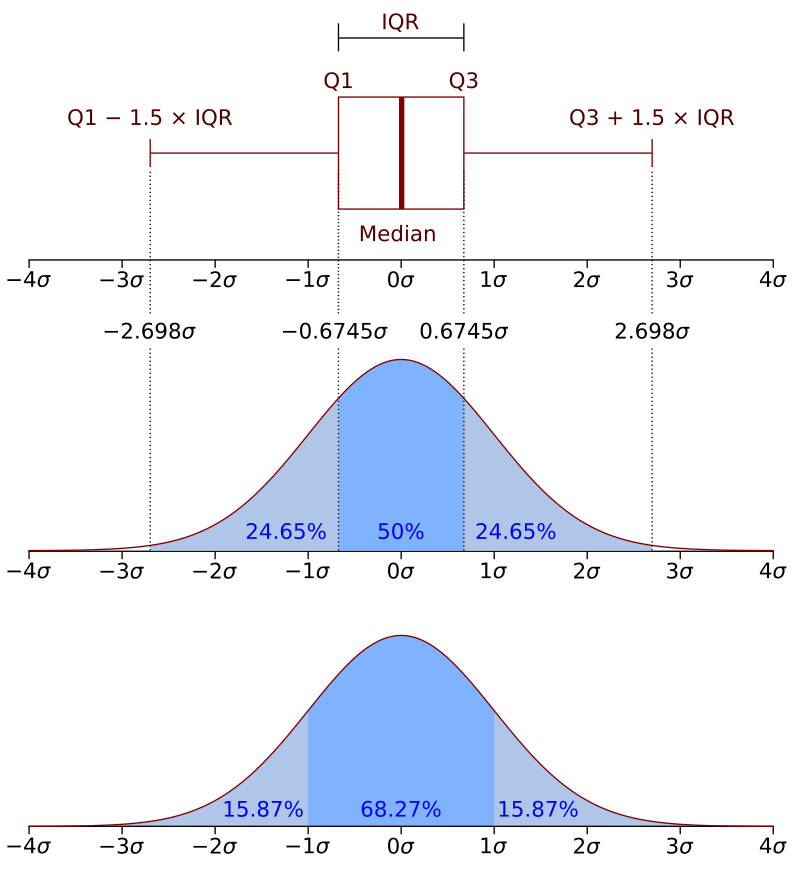


In [11]:
ser.describe()

count    100.00000
mean      48.66000
std       11.82039
min       16.00000
25%       42.00000
50%       48.00000
75%       55.25000
max       74.00000
dtype: float64

In [12]:
# IQR = [value at (75%)] -[Value at (25%)]
IQR = 55.25 - 42.00
IQR

13.25

In [13]:
lower_limit = 42.00 - (1.5*IQR)
upper_limit = 55.25 + (1.5*IQR)
print("Lower Limit is {ll} and upper limit is {ul}".format(ll=lower_limit,ul=upper_limit))

Lower Limit is 22.125 and upper limit is 75.125


### Considering above Limits, anything outside these range(below the lower limit and above the uppper limit) we will consider as Outliers.

In [15]:
# Using numpy find out the values corresponding to 25% and 75%, will return an array of result values
np.percentile(sample,[25,75])

array([42.  , 55.25])

In [16]:
q25,q75 = np.percentile(sample,[25,75])
q25,q75

(42.0, 55.25)

In [17]:
IQR = q75-q25
print("IQR is "+str(IQR))

IQR is 13.25


In [18]:
df = pd.read_csv(r"D:\Data Science 2024\Study\AmesHousing.csv")
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [19]:
df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

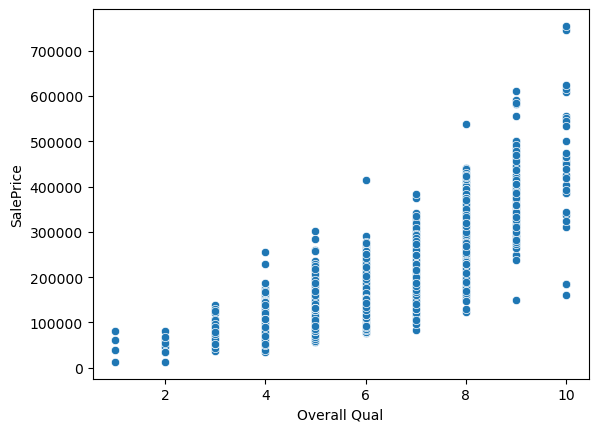

In [20]:
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df)

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

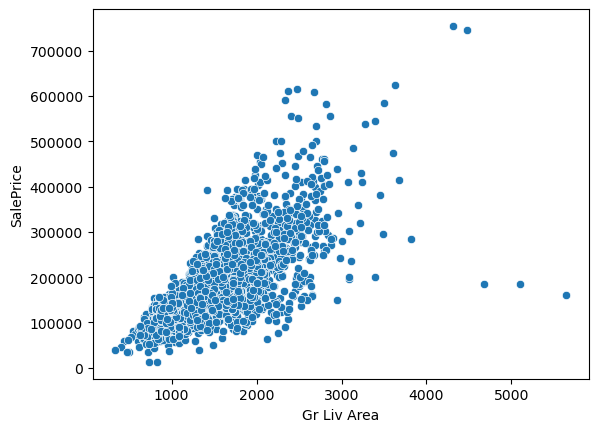

In [21]:
 sns.scatterplot(data=df,x='Gr Liv Area',y='SalePrice')

### The points far away from the general trend are nothing but the outlier

In [23]:
df[(df['Overall Qual']>8) & (df['SalePrice']<200000)]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,1183,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,2182,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


### Above data rows are the outliers because House with Overall Quality is greater than 8 whose SalePrice is very low

In [25]:
df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,2182,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


### Above records are outliers because Gr Living Area houses are sold at very less price.
#### Now drop these rows from our dataset

In [27]:
drop_index = df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)].index
drop_index

Index([1498, 2180, 2181], dtype='int64')

In [28]:
df = df.drop(drop_index,axis=0) #axis=0 is for rows
df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

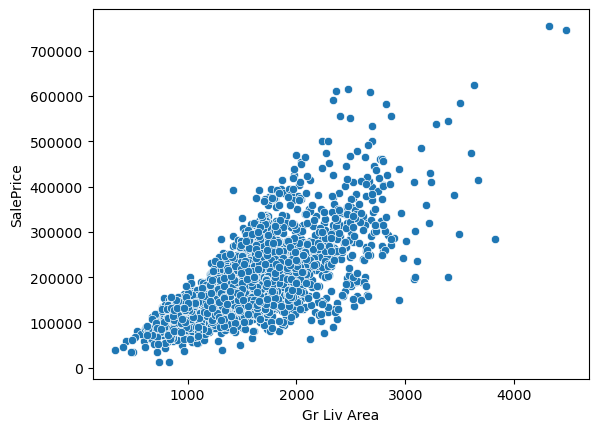

In [29]:
sns.scatterplot(data=df,x='Gr Liv Area',y='SalePrice')

## Save this dataset as "Outliers_removed" suffix

In [31]:
df.to_csv(r"D:\Data Science 2024\Study\ames_outliers_removed.csv")

# End Of the Session